In [1]:
import numpy as np
import scipy.optimize as sci
from scipy import constants
#import sigfig as sf # Pacote para expressar incertezas e dígitos significativos
import pandas as pd
from scipy.integrate import quad

# Module of Dr. Sato's Analytical Model
import SatoLowAltNeutronBkg as sato

In [2]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 9pt font in plots, to match 9pt caption fontsize in RevTeX
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "figure.titlesize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "axes.linewidth": 0.5
}
#plt.rcParams.update(tex_fonts)

from my_plot import set_size
plt.rcParams["figure.figsize"] = set_size(500)

In [6]:
x = np.logspace(-9, 5, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
Φ_tot = np.trapz(y_flux,x, 0.0001)
Φ_tot

0.008193178421262026

In [10]:
x = np.logspace(1, 5, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
Φ = np.trapz(y_flux,x, 0.0001)
Φ/Φ_tot

0.35297966933458275

In [11]:
x = np.logspace(1, 5, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)*1.15
y_flux = y_leth/x
Φ = np.trapz(y_flux,x, 0.0001)
Φ/Φ_tot

0.4059266197347701

In [12]:
x = np.logspace(1, 5, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)*0.85
y_flux = y_leth/x
Φ = np.trapz(y_flux,x, 0.0001)
Φ/Φ_tot

0.3000327189343953

In [7]:
a = np.linspace(-8, 4, 150)
arr = []
for i in np.arange(0, np.size(a) - 1):
    t = np.logspace(a[i], a[i + 1], 100)
    y_leth = sato.EΦ(t,1034,9.76,0.25)
    y_flux = y_leth / t**2
    y_fluence_year = y_flux*365*24*3600*1e3 # O fator 1e3 é devido ao fato de que o código pede unidades em GeV
    F = np.trapz(y_flux, t, 0.001)
    arr_elem = ["{:E}".format(10**a[i]), "{:E}".format(10**a[i + 1]), "{:E}".format(F)]
    arr.append(arr_elem)

column_values = ['Emin', 'Emax', 'Fluence'] # Fluence = dF/dE [particles/cm²GeV]
df = pd.DataFrame(data = arr, 
                  columns = column_values)

df = df.astype(float) # Converte os strings em floats
pd.options.display.float_format = '{:E}'.format # Formatação dos floats
df.to_csv('/home/mbergamo/Sim/Sim9/spec.dat', sep = ' ', float_format = '{:E}'.format, header = None, index = None)
df

,Emin,Emax,Fluence
0,1.000000E-08,1.203752E-08,3.001268E+03
1,1.203752E-08,1.449018E-08,3.296521E+03
2,1.449018E-08,1.744258E-08,3.557164E+03
3,1.744258E-08,2.099654E-08,3.757028E+03
4,2.099654E-08,2.527462E-08,3.866891E+03
...,...,...,...
144,3.956539E+03,4.762690E+03,2.800149E-09
145,4.762690E+03,5.733097E+03,1.978671E-09
146,5.733097E+03,6.901225E+03,1.392670E-09
147,6.901225E+03,8.307361E+03,9.768735E-10


In [4]:
a = np.linspace(-9, 5, int(1e4))
arr = []
for i in np.arange(0, np.size(a) - 1):
    t = np.logspace(a[i], a[i + 1], 100)
    y_leth = sato.EΦ(t,1034,9.76,0.25)
    y_flux = y_leth / t**2
    y_fluence_year = y_flux*365*24*3600*1e3 # O fator 1e3 é devido ao fato de que o código pede unidades em GeV
    F = np.trapz(y_flux, t, 0.001)
    arr_elem = ["{:E}".format(10**a[i]), "{:E}".format(10**a[i + 1]), "{:E}".format(F)]
    arr.append(arr_elem)

column_values = ['Emin', 'Emax', 'Fluence'] # Fluence = dF/dE [particles/cm²GeV]
df = pd.DataFrame(data = arr, 
                  columns = column_values)

df = df.astype(float) # Converte os strings em floats
pd.options.display.float_format = '{:E}'.format # Formatação dos floats
df.to_csv('/home/mbergamo/Sim/Natal5/spec.dat', sep = ' ', float_format = '{:E}'.format, header = None, index = None)
df

,Emin,Emax,Fluence
0,1.000000E-09,1.003229E-09,7.823750E+00
1,1.003229E-09,1.006469E-09,7.845798E+00
2,1.006469E-09,1.009719E-09,7.867910E+00
3,1.009719E-09,1.012979E-09,7.890086E+00
4,1.012979E-09,1.016250E-09,7.912325E+00
...,...,...,...
9994,9.840095E+04,9.871870E+04,1.054065E-13
9995,9.871870E+04,9.903748E+04,1.047274E-13
9996,9.903748E+04,9.935729E+04,1.040527E-13
9997,9.935729E+04,9.967812E+04,1.033824E-13


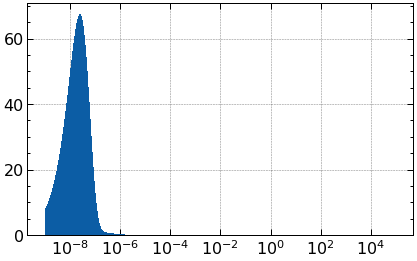

In [5]:
mean = (df.Emax + df.Emin)/2
interval = (df.Emax - df.Emin)
mean = mean.to_numpy()
interval = interval.to_numpy()
fluence = df.Fluence.to_numpy()
plt.bar(mean, fluence, interval)#, edgecolor='black')
plt.xscale('log')
#plt.yscale('log')

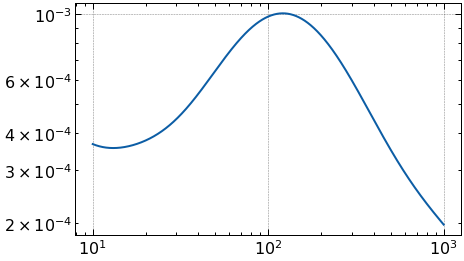

In [24]:
x = np.logspace(1, 3, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
plt.plot(x, y_leth)
#plt.plot(x, y_flux)
plt.xscale('log')
plt.yscale('log')

(array([4641.,  108.,   63.,   44.,   35.,   28.,   24.,   21.,   18.,
          17.]),
 array([6.46900e-12, 6.42780e+01, 1.28556e+02, 1.92834e+02, 2.57112e+02,
        3.21390e+02, 3.85668e+02, 4.49946e+02, 5.14224e+02, 5.78502e+02,
        6.42780e+02]),
 <BarContainer object of 10 artists>)

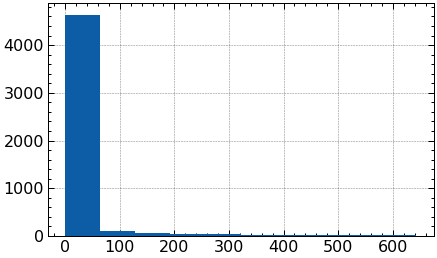

In [25]:
plt.hist(interval)